In [24]:
import pandas as pd
import plotly.express as px

In [25]:
config_chart = {
        'scrollZoom': True,
        'displaylogo': True,
        'responsive': True,
        'editable': True,
        'toImageButtonOptions': {
            'format': 'png',  # one of png, svg, jpeg, webp
            'filename': 'grafica_CAP',
            'height': None,
            'width': None,
            'scale': True  # Multiply title/legend/axis/canvas sizes by this factor
        }}

# Grupo Comentarios

In [26]:
comentariosg=pd.read_excel('Acumulado Grupo 2022.xlsx')
# comentariosg

## Grupo Comentarios = Genero x CAP

In [4]:
tipo='''Positivo para comunidad de práctica	Participa en una discusión grupal con dos o más docentes	Comparte su experiencia frente a la actividad	Ayuda a otros docentes a resolver dudas/ dificultades. Realiza sugerencias	Solicita apoyo a otros docentes para resolver sus dudas/ dificultades	Tendencia a trabajo individual	NA'''
tipos = tipo.split('	')
tipos

['Positivo para comunidad de práctica',
 'Participa en una discusión grupal con dos o más docentes',
 'Comparte su experiencia frente a la actividad',
 'Ayuda a otros docentes a resolver dudas/ dificultades. Realiza sugerencias',
 'Solicita apoyo a otros docentes para resolver sus dudas/ dificultades',
 'Tendencia a trabajo individual',
 'NA']

In [5]:
nuevost= ['Positivo para comunidad de práctica',
 'Participa en una discusión grupal',
 'Comparte su experiencia frente a la actividad',
 'Ayuda a resolver dudas y realiza sugerencias',
 'Solicita apoyo para resolver sus dudas',
 'Tendencia a trabajo individual',
 'No indica consolidación de CAP']

etiquetas = dict(zip(tipos,nuevost))

In [6]:
genero_tipos = comentariosg.loc[:,['Género']+tipos]
genero_tipos = genero_tipos.rename(columns=etiquetas)
genero_tipos

,Género,Positivo para comunidad de práctica,Participa en una discusión grupal,Comparte su experiencia frente a la actividad,Ayuda a resolver dudas y realiza sugerencias,Solicita apoyo para resolver sus dudas,Tendencia a trabajo individual,No indica consolidación de CAP
0,Hombre,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,No especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hombre,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,No especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hombre,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Mujer,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,No especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Hombre,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Hombre,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Mujer,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
genero_tipos=genero_tipos.melt(id_vars='Género')
genero_tipos

,Género,variable,value
0,Hombre,Positivo para comunidad de práctica,NaN
1,No especificado,Positivo para comunidad de práctica,NaN
2,Hombre,Positivo para comunidad de práctica,1.0
3,No especificado,Positivo para comunidad de práctica,NaN
4,Hombre,Positivo para comunidad de práctica,1.0
...,...,...,...
184,Hombre,No indica consolidación de CAP,NaN
185,No especificado,No indica consolidación de CAP,NaN
186,Hombre,No indica consolidación de CAP,NaN
187,No especificado,No indica consolidación de CAP,NaN


In [8]:
pivot=genero_tipos.pivot_table(index=['Género', 'variable'],values='value', aggfunc='sum').reset_index()
pivot=pivot.rename(columns={'value':'Cant', 'variable':'Tipo de interacción'})
pivot

,Género,Tipo de interacción,Cant
0,Hombre,Ayuda a resolver dudas y realiza sugerencias,0.0
1,Hombre,Comparte su experiencia frente a la actividad,1.0
2,Hombre,No indica consolidación de CAP,0.0
3,Hombre,Participa en una discusión grupal,1.0
4,Hombre,Positivo para comunidad de práctica,7.0
5,Hombre,Solicita apoyo para resolver sus dudas,3.0
6,Hombre,Tendencia a trabajo individual,0.0
7,Mujer,Ayuda a resolver dudas y realiza sugerencias,1.0
8,Mujer,Comparte su experiencia frente a la actividad,0.0
9,Mujer,No indica consolidación de CAP,3.0


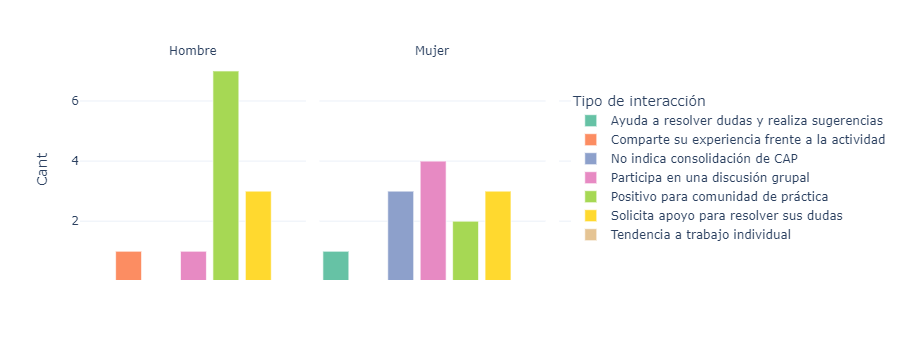

In [27]:
figc=px.bar(pivot,x='Tipo de interacción', y='Cant', color='Tipo de interacción', facet_col='Género', template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2)
figc.update_xaxes(visible=False, showticklabels=False)
figc.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
figc.show(config=config_chart)

## Grupo Comentarios = Genero x Genero

In [10]:
tipogen='''Lenguaje Inclusivo	Comentario Sexista	Lenguaje No Inclusivo	Empoderamiento Femenino o en Pro de Género	NA'''
tiposgen = tipogen.split('	')
tiposgen

['Lenguaje Inclusivo',
 'Comentario Sexista',
 'Lenguaje No Inclusivo',
 'Empoderamiento Femenino o en Pro de Género',
 'NA']

In [11]:
nuevostgen = ['Lenguaje Inclusivo',
 'Comentario sexista',
 'Uso de lenguaje no inclusivo',
 'En pro de la equidad de Género',
 'No relevante en perspectiva de género']

etiquetas2 = dict(zip(tiposgen,nuevostgen))

In [12]:
genero_tiposgen=comentariosg.loc[:,['Género']+tiposgen]
genero_tiposgen = genero_tiposgen.rename(columns=etiquetas2)
genero_tiposgen

,Género,Lenguaje Inclusivo,Comentario sexista,Uso de lenguaje no inclusivo,En pro de la equidad de Género,No relevante en perspectiva de género
0,Hombre,NaN,NaN,NaN,NaN,NaN
1,No especificado,NaN,NaN,NaN,NaN,NaN
2,Hombre,NaN,NaN,NaN,NaN,NaN
3,No especificado,NaN,NaN,NaN,NaN,NaN
4,Hombre,NaN,NaN,NaN,NaN,NaN
5,Mujer,NaN,NaN,NaN,NaN,NaN
6,No especificado,NaN,NaN,NaN,NaN,NaN
7,Hombre,NaN,NaN,NaN,NaN,NaN
8,Hombre,NaN,NaN,NaN,NaN,NaN
9,Mujer,NaN,NaN,NaN,NaN,1.0


In [13]:
genero_tiposgen=genero_tiposgen.melt(id_vars='Género')
genero_tiposgen

,Género,variable,value
0,Hombre,Lenguaje Inclusivo,NaN
1,No especificado,Lenguaje Inclusivo,NaN
2,Hombre,Lenguaje Inclusivo,NaN
3,No especificado,Lenguaje Inclusivo,NaN
4,Hombre,Lenguaje Inclusivo,NaN
...,...,...,...
130,Hombre,No relevante en perspectiva de género,NaN
131,No especificado,No relevante en perspectiva de género,NaN
132,Hombre,No relevante en perspectiva de género,NaN
133,No especificado,No relevante en perspectiva de género,NaN


In [14]:
pivotgen=genero_tiposgen.pivot_table(index=['Género', 'variable'],values='value', aggfunc='sum').reset_index()
pivotgen=pivotgen.rename(columns={'value':'Cant', 'variable':'Tipo de interacción'})
pivotgen

,Género,Tipo de interacción,Cant
0,Hombre,Comentario sexista,0.0
1,Hombre,En pro de la equidad de Género,0.0
2,Hombre,Lenguaje Inclusivo,1.0
3,Hombre,No relevante en perspectiva de género,0.0
4,Hombre,Uso de lenguaje no inclusivo,0.0
5,Mujer,Comentario sexista,0.0
6,Mujer,En pro de la equidad de Género,0.0
7,Mujer,Lenguaje Inclusivo,0.0
8,Mujer,No relevante en perspectiva de género,3.0
9,Mujer,Uso de lenguaje no inclusivo,1.0


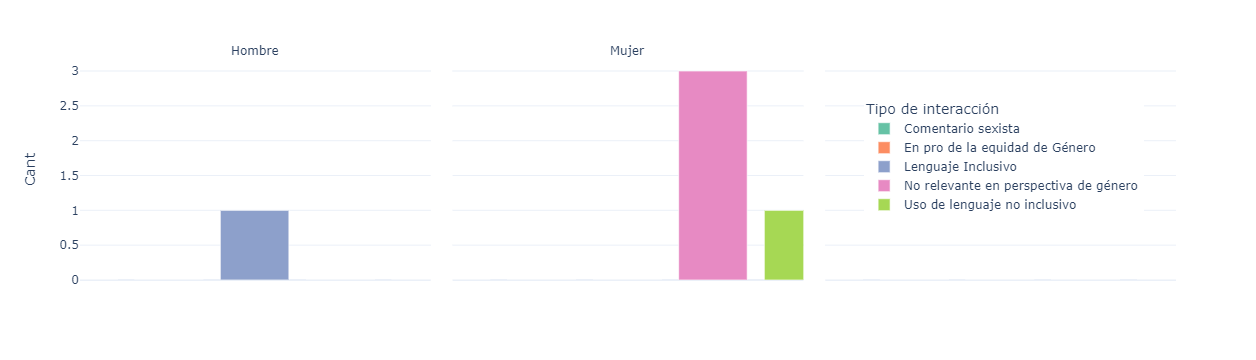

In [28]:
figcg=px.bar(pivotgen,x='Tipo de interacción', y='Cant', color='Tipo de interacción', facet_col='Género', template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2)
figcg.update_xaxes(visible=False, showticklabels=False)
figcg.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
figcg.show(config=config_chart)

## Grupo Comentarios = Publicaciones x CAP

In [16]:
public_tipos=comentariosg.loc[:,['Tipo_post']+tipos]
public_tipos = public_tipos.rename(columns=etiquetas)
public_tipos

,Tipo_post,Positivo para comunidad de práctica,Participa en una discusión grupal,Comparte su experiencia frente a la actividad,Ayuda a resolver dudas y realiza sugerencias,Solicita apoyo para resolver sus dudas,Tendencia a trabajo individual,No indica consolidación de CAP
0,Recursos,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,Recursos,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Recursos,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Recursos,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Recursos,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Recursos,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Recursos,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Recursos,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Recursos,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Invitación,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
public_tipos=public_tipos.melt(id_vars='Tipo_post')
public_tipos

,Tipo_post,variable,value
0,Recursos,Positivo para comunidad de práctica,NaN
1,Recursos,Positivo para comunidad de práctica,NaN
2,Recursos,Positivo para comunidad de práctica,1.0
3,Recursos,Positivo para comunidad de práctica,NaN
4,Recursos,Positivo para comunidad de práctica,1.0
...,...,...,...
184,Pregunta,No indica consolidación de CAP,NaN
185,Pregunta,No indica consolidación de CAP,NaN
186,Pregunta,No indica consolidación de CAP,NaN
187,Pregunta,No indica consolidación de CAP,NaN


In [18]:
pivotpub=public_tipos.pivot_table(index=['Tipo_post', 'variable'],values='value', aggfunc='sum').reset_index()
pivotpub=pivotpub.rename(columns={'value':'Cant', 'variable':'Tipo de interacción'})
pivotpub

,Tipo_post,Tipo de interacción,Cant
0,Invitación,Ayuda a resolver dudas y realiza sugerencias,1.0
1,Invitación,Comparte su experiencia frente a la actividad,0.0
2,Invitación,No indica consolidación de CAP,1.0
3,Invitación,Participa en una discusión grupal,3.0
4,Invitación,Positivo para comunidad de práctica,1.0
5,Invitación,Solicita apoyo para resolver sus dudas,3.0
6,Invitación,Tendencia a trabajo individual,0.0
7,Pregunta,Ayuda a resolver dudas y realiza sugerencias,0.0
8,Pregunta,Comparte su experiencia frente a la actividad,1.0
9,Pregunta,No indica consolidación de CAP,1.0


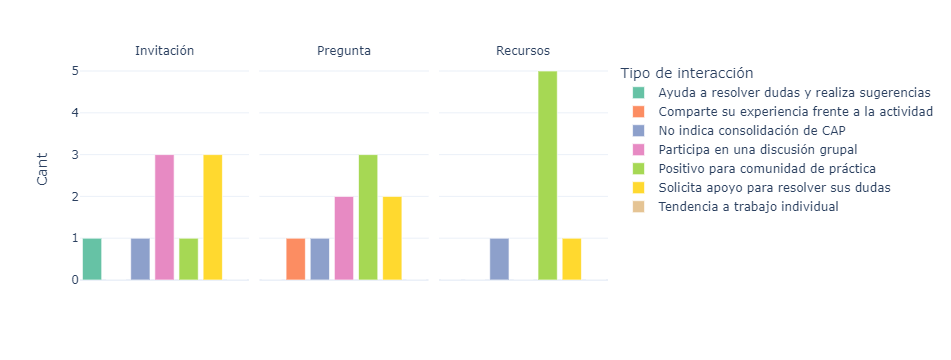

In [29]:
figpub=px.bar(pivotpub,x='Tipo de interacción', y='Cant', color='Tipo de interacción', facet_col='Tipo_post', template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2, facet_col_wrap=5)
figpub.update_xaxes(visible=False, showticklabels=False)
figpub.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
figpub.show(config=config_chart)

## Grupo Comentarios = Publicaciones x Género

In [20]:
public_tiposgen = comentariosg.loc[:,['Tipo_post']+tiposgen]
public_tiposgen = public_tiposgen.rename(columns=etiquetas2)
public_tiposgen

,Tipo_post,Lenguaje Inclusivo,Comentario sexista,Uso de lenguaje no inclusivo,En pro de la equidad de Género,No relevante en perspectiva de género
0,Recursos,NaN,NaN,NaN,NaN,NaN
1,Recursos,NaN,NaN,NaN,NaN,NaN
2,Recursos,NaN,NaN,NaN,NaN,NaN
3,Recursos,NaN,NaN,NaN,NaN,NaN
4,Recursos,NaN,NaN,NaN,NaN,NaN
5,Recursos,NaN,NaN,NaN,NaN,NaN
6,Recursos,NaN,NaN,NaN,NaN,NaN
7,Recursos,NaN,NaN,NaN,NaN,NaN
8,Recursos,NaN,NaN,NaN,NaN,NaN
9,Invitación,NaN,NaN,NaN,NaN,1.0


In [21]:
public_tiposgen=public_tiposgen.melt(id_vars='Tipo_post')
public_tiposgen

,Tipo_post,variable,value
0,Recursos,Lenguaje Inclusivo,NaN
1,Recursos,Lenguaje Inclusivo,NaN
2,Recursos,Lenguaje Inclusivo,NaN
3,Recursos,Lenguaje Inclusivo,NaN
4,Recursos,Lenguaje Inclusivo,NaN
...,...,...,...
130,Pregunta,No relevante en perspectiva de género,NaN
131,Pregunta,No relevante en perspectiva de género,NaN
132,Pregunta,No relevante en perspectiva de género,NaN
133,Pregunta,No relevante en perspectiva de género,NaN


In [22]:
pivotpublicgen=public_tiposgen.pivot_table(index=['Tipo_post', 'variable'],values='value', aggfunc='sum').reset_index()
pivotpublicgen=pivotpublicgen.rename(columns={'value':'Cant', 'variable':'Tipo de interacción'})
pivotpublicgen

,Tipo_post,Tipo de interacción,Cant
0,Invitación,Comentario sexista,0.0
1,Invitación,En pro de la equidad de Género,0.0
2,Invitación,Lenguaje Inclusivo,0.0
3,Invitación,No relevante en perspectiva de género,1.0
4,Invitación,Uso de lenguaje no inclusivo,0.0
5,Pregunta,Comentario sexista,0.0
6,Pregunta,En pro de la equidad de Género,0.0
7,Pregunta,Lenguaje Inclusivo,1.0
8,Pregunta,No relevante en perspectiva de género,1.0
9,Pregunta,Uso de lenguaje no inclusivo,1.0


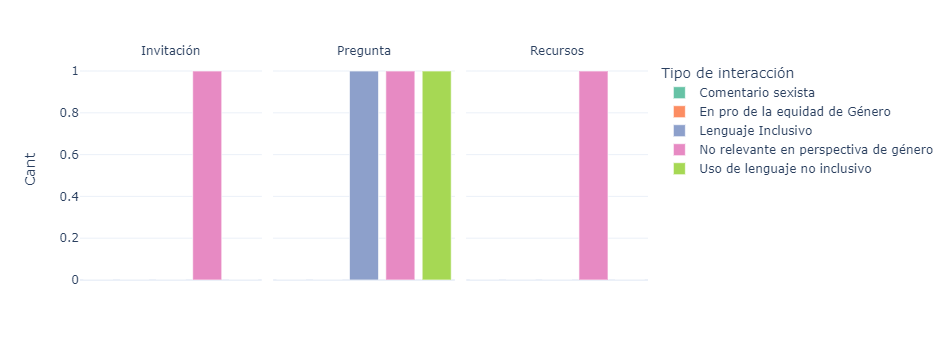

In [30]:
figcpubg=px.bar(pivotpublicgen,x='Tipo de interacción', y='Cant', color='Tipo de interacción', facet_col='Tipo_post', template="plotly_white",color_discrete_sequence=px.colors.qualitative.Set2, facet_col_wrap=3)
figcpubg.update_xaxes(visible=False, showticklabels=False)
figcpubg.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
figcpubg.show(config=config_chart)